## import the necessary libraries

In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools wheel

In [ ]:
!brew install ffmpeg libsndfile

In [ ]:
!brew reinstall ffmpeg
!brew reinstall libsndfile

In [ ]:
!pip install sf_segmenter
!pip install librosa miditoolkit pretty_midi matplotlib

In [ ]:
!pip install sf_segmenter pretty_midi midiutil matplotlib numpy

In [1]:
import sf_segmenter
import pretty_midi
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import filters
from IPython.display import Audio, display

# configure matplotlib for inline plotting
%matplotlib inline

# define the input MIDI file and configuration
INPUT_PATH = "Something_in_the_Way.mid"
CONFIG = {
    "M_gaussian": 10,       # smaller Gaussian window for higher resolution
    "m_embedded": 2,        # reduce embedded dimensions to increase sensitivity
    "k_nearest": 0.02,      # smaller k_nearest to increase sensitivity
    "Mp_adaptive": 10,      # smaller adaptive window for higher resolution
    "offset_thres": 0.02,   # lower offset threshold for more boundaries
    "bound_norm_feats": np.inf  # normalization method
}

# initialize the segmenter
segmenter = sf_segmenter.Segmenter(config=CONFIG)

In [2]:
# process the MIDI file to extract segments
segmenter.proc_midi(INPUT_PATH)

 > 0
 > 1
 > 2
 > 3
 > 4
 > 5
 > 6
 > 7
 > 8
 > 9
 > 10
 > 11


(array([  0,   7,  24,  40,  48,  56,  74,  85,  96, 107, 120, 142, 174]),
 array([0., 0., 1., 2., 2., 3., 4., 5., 6., 7., 8., 9.]))

 [o] save to ... plots


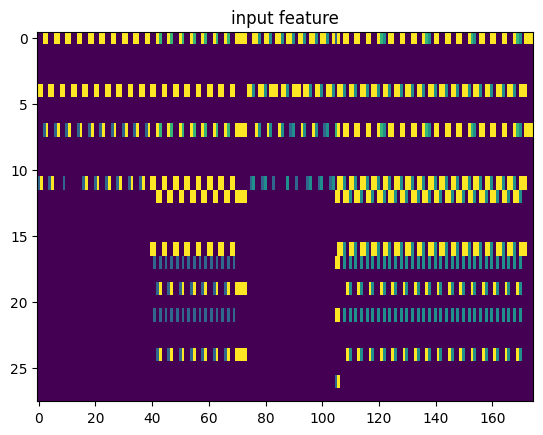

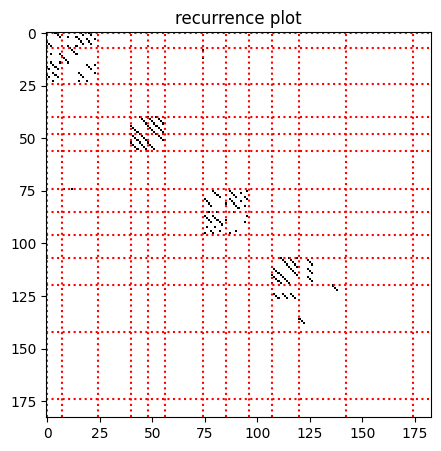

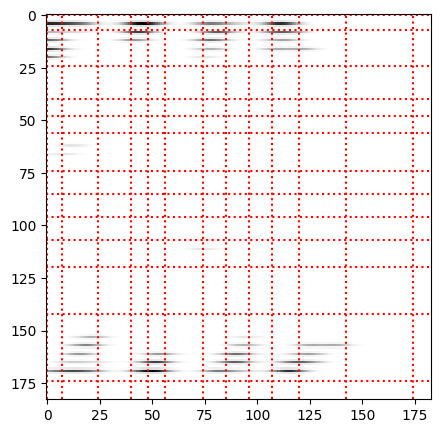

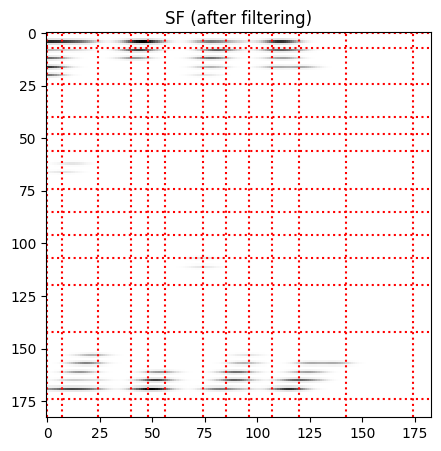

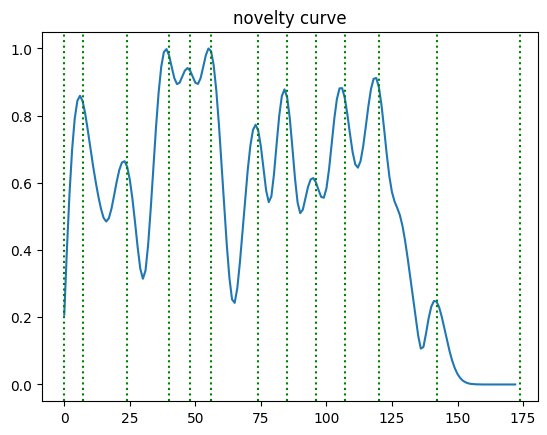

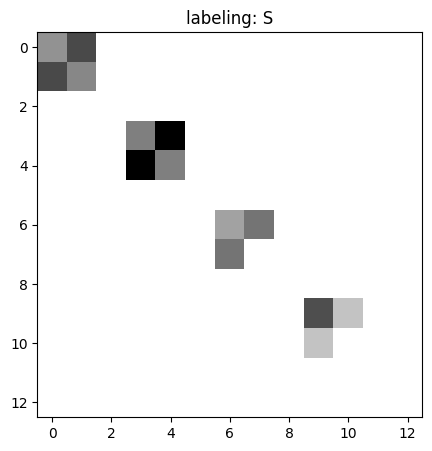

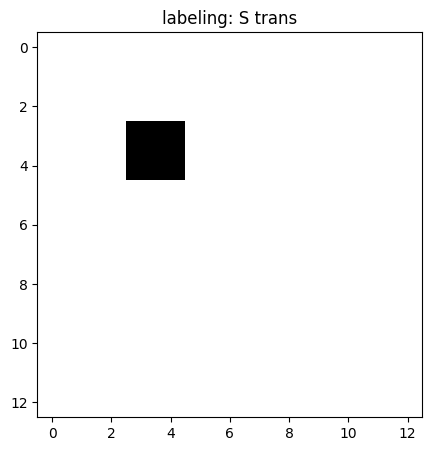

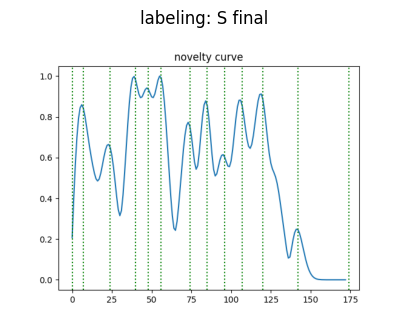

In [3]:
# generate and display the novelty curve
output_dir = "plots"
segmenter.plot(output_dir)

# load and display the generated novelty curve plot
novelty_curve_path = f"{output_dir}/nc.png"
img = plt.imread(novelty_curve_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
output_dir = 'samples'

In [10]:
# CAREFUL here, kinda mock function to simulate segment retrieval, replace with actual method if available
def get_segments_from_novelty_curve(segmenter):
    # assuming the segmenter provides segment times in some accessible way
    # here we mock the result for demonstration purposes
    return [(i, i + 5) for i in range(0, 100, 5)]  # shorter segments, every 5 seconds

# get segments from the segmenter (replace with actual method)
segments = get_segments_from_novelty_curve(segmenter)
midi_data = pretty_midi.PrettyMIDI(INPUT_PATH)

# create a function to extract a segment
def extract_midi_segment(midi_data, start_time, end_time, output_path):
    segment = pretty_midi.PrettyMIDI()
    for instrument in midi_data.instruments:
        new_instrument = pretty_midi.Instrument(program=instrument.program)
        for note in instrument.notes:
            if start_time <= note.start < end_time:
                new_note = pretty_midi.Note(
                    velocity=note.velocity,
                    pitch=note.pitch,
                    start=note.start - start_time,
                    end=note.end - start_time
                )
                new_instrument.notes.append(new_note)
        segment.instruments.append(new_instrument)
    segment.write(output_path)

# extract and display segments
for i, (start_time, end_time) in enumerate(segments):
    output_path = f"{output_dir}/segment_{i}.mid"
    extract_midi_segment(midi_data, start_time, end_time, output_path)

# This one is mock for testing